In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap


In [124]:
class Perceptron():
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc= 0.0, scale = 0.01, size = 1 + X.shape[1])
        
        self.errors = []
        
        for i in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update

                errors += int(update != 0.0)
            
            self.errors.append(errors)
        print(self.w_)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) > 0, 1, -1)

# Tests on synthetic data

In [125]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [126]:
x1 = np.random.randint(1, 20, 10)
x2 = np.random.randint(1, 20, 10)
X = np.column_stack((x1, x2))
y = 1 + 2*x1 + 3*x2
y = np.where(y > 60, 1, -1)

In [127]:
x1[y == -1]

array([ 4, 16,  1,  8,  2, 17,  4, 10, 16])

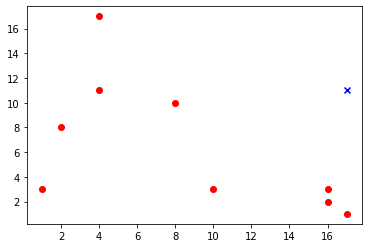

In [128]:
# plt.scatter(x1, x2[where])
cols = ['red', 'blue']
plt.scatter(x1[y == -1], x2[y == -1], color='red', marker = 'o')
plt.scatter(x1[y == 1], x2[y == 1], color='blue', marker = 'x')

[-0.36375655  0.01388244  0.01471828]


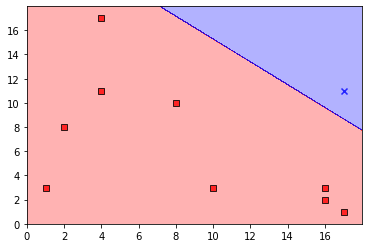

In [129]:
p = Perceptron(n_iter=200)
p.fit(X, y)
plot_decision_regions(X, y, p)

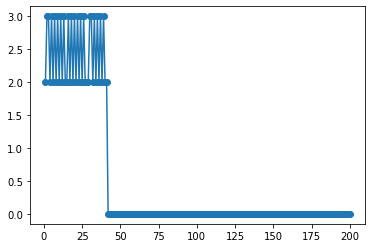

In [130]:
plt.plot(range(1, len(p.errors) + 1), p.errors, marker = 'o')

In [104]:
y

array([ 1, -1,  1, -1,  1, -1, -1,  1,  1,  1])

In [109]:
p.predict(X)

array([-1, -1,  1,  1,  1, -1,  1, -1,  1, -1])

In [41]:
X = np.column_stack((x1, x2))

In [42]:
p = Perceptron(n_iter=3000)
p.fit(X, y)

[-5.28375655  0.19388244  0.35471828]


In [43]:
p.predict(X)

array([-1, -1,  1,  1, -1, -1, -1,  1, -1,  1])

# testing on Iris dataset

In [46]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
     'machine-learning-databases/iris/iris.data',
     header=None)


In [47]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
df.shape

(150, 5)

In [53]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

In [57]:
X = df.iloc[0:100, [0, 2]].values

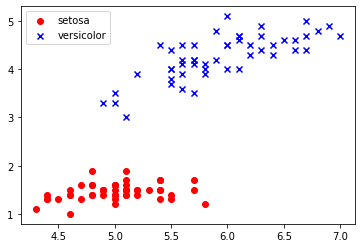

In [69]:
plt.scatter(x = X[:50, 0], y = X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker = 'x', label = 'versicolor')
plt.legend()


In [70]:
ppn = Perceptron(eta = 0.1, n_iter=10)
ppn.fit(X, y)

[-0.38375655 -0.70611756  1.83471828]


Text(0, 0.5, 'number of updates')

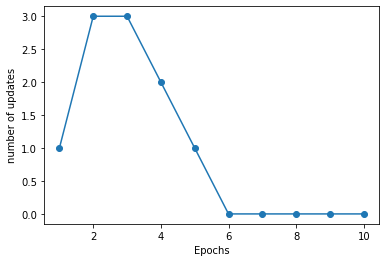

In [74]:
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('number of updates')

In [80]:
a,b  = np.meshgrid([1, 2, 3], [4, 5])

In [82]:
a

array([[1, 2, 3],
       [1, 2, 3]])

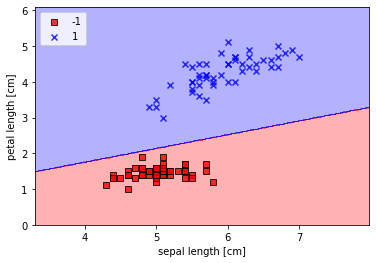

In [88]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')




plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')